In [1]:
#Importa as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Importa os dados e define a coluna 'date' como índice
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date') 

# Realiza a limpeza de dados, removendo os 2,5% mais altos e 2,5% mais baixos
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [4]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


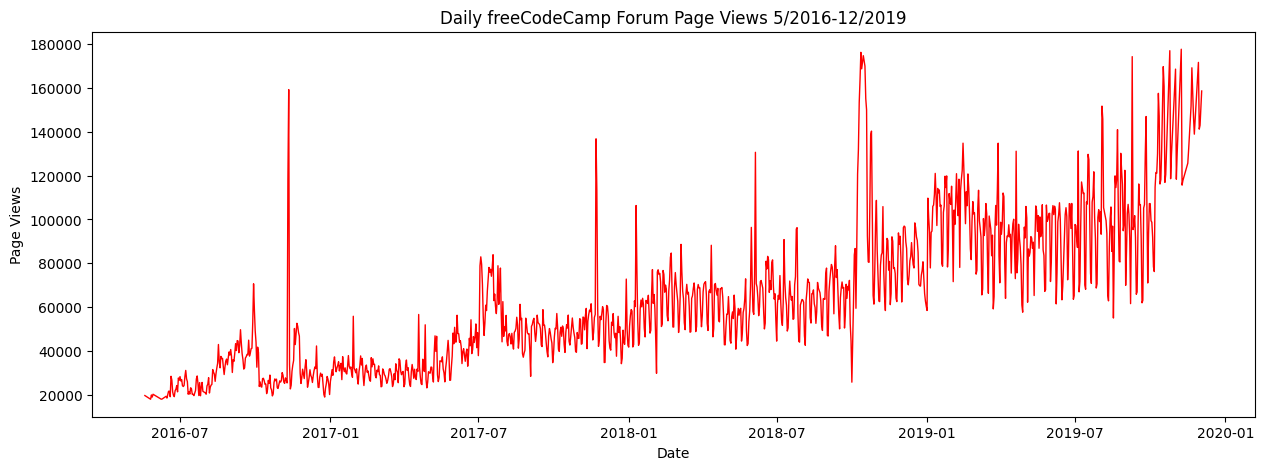

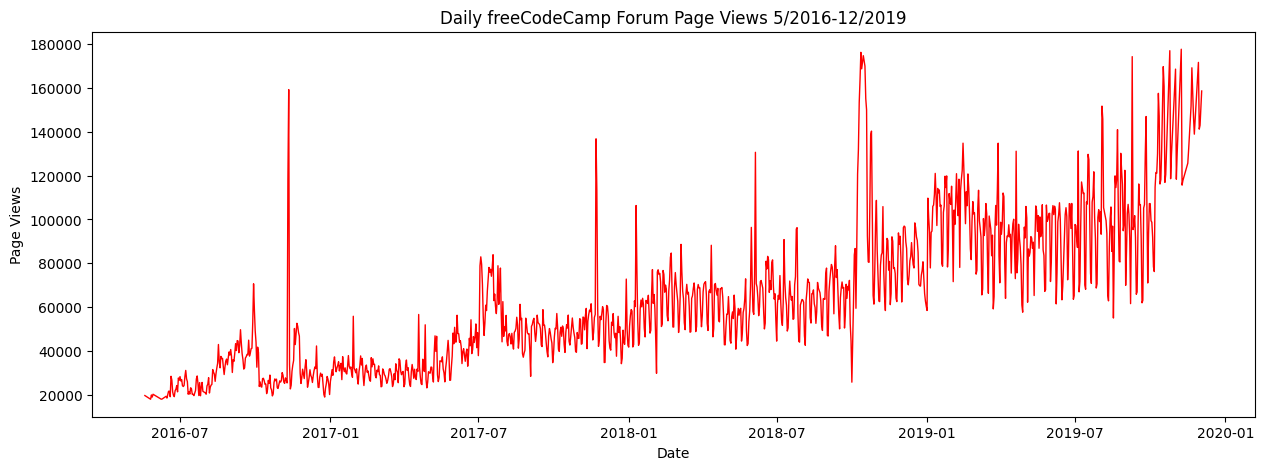

In [9]:
def draw_line_plot():
    # Plota o gráfico de linha
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)

    #Adiciona o título e os rótulos dos eixos
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # Salva a imagem e retorna a figura
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

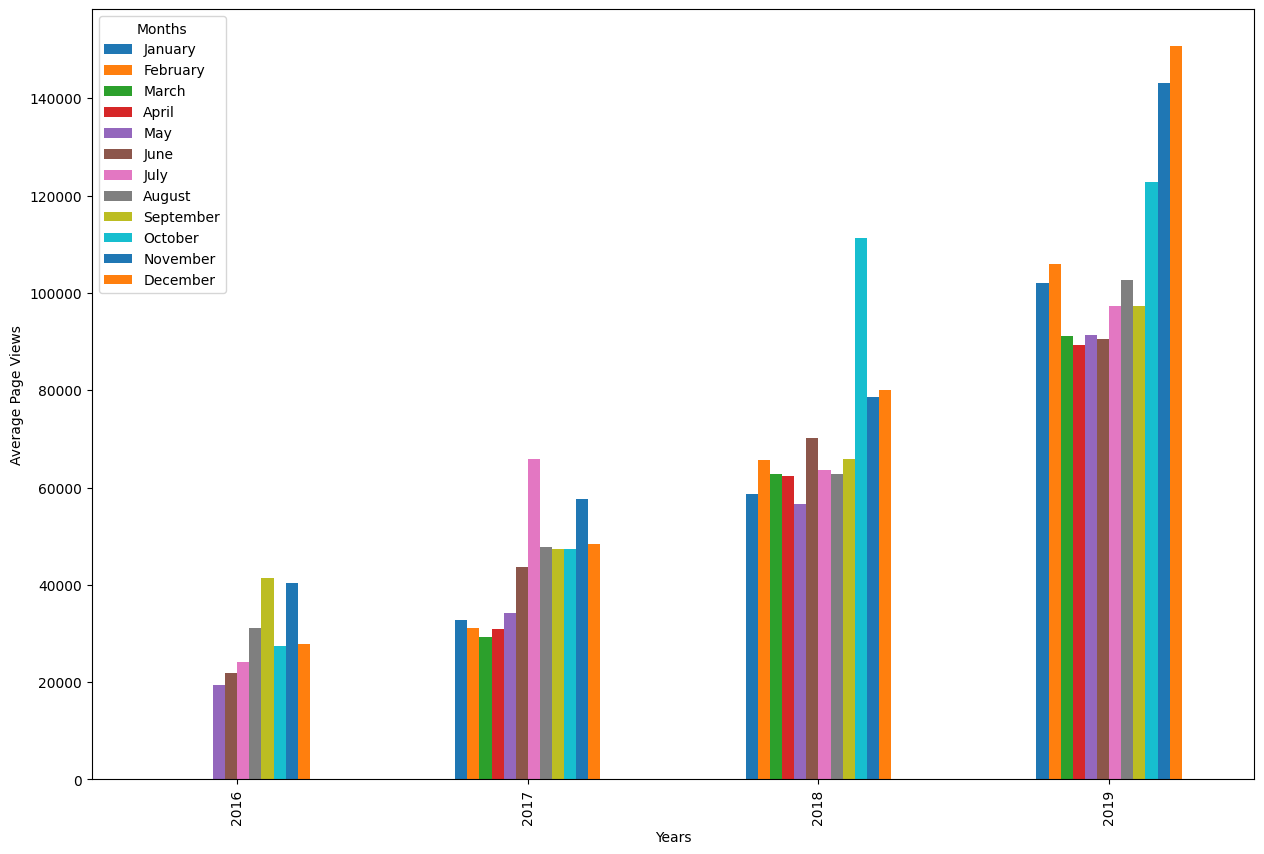

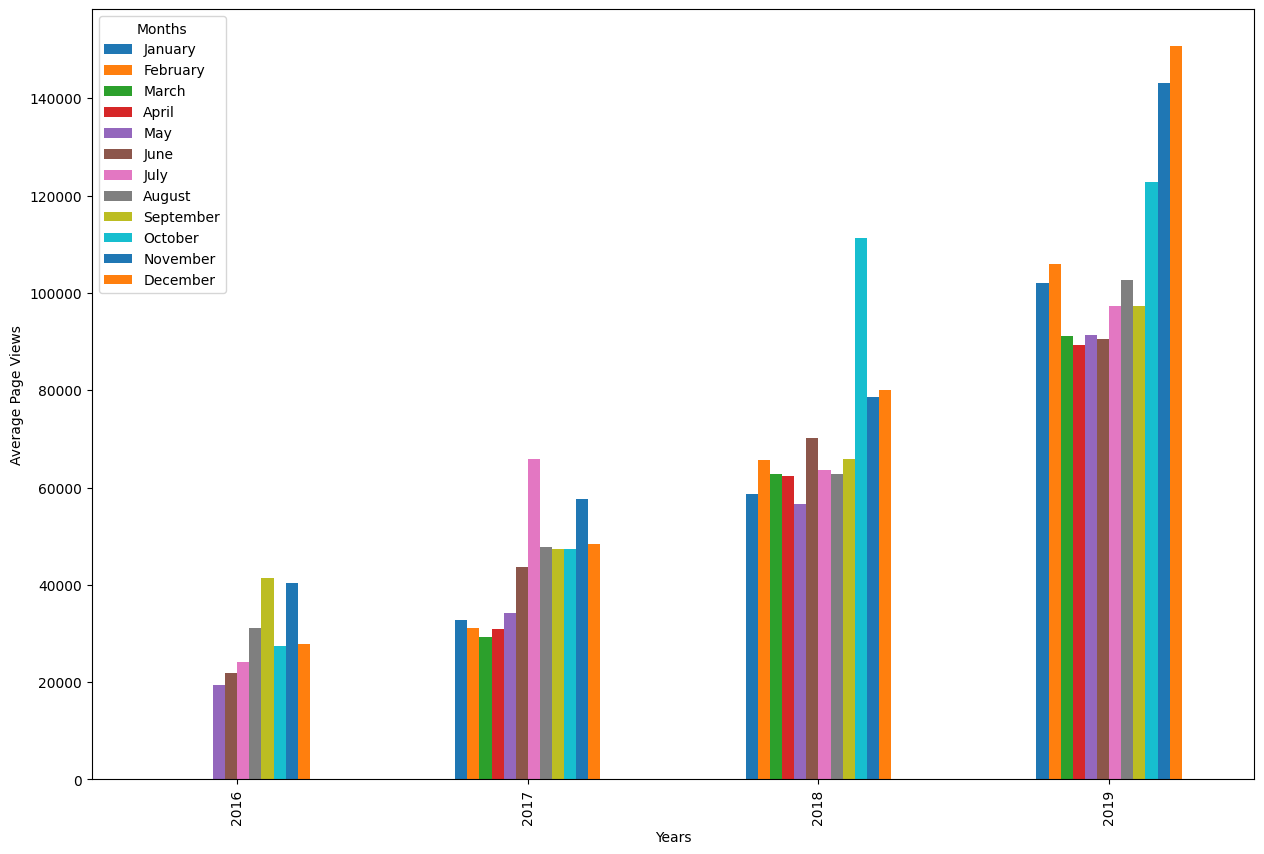

In [10]:
def draw_bar_plot():
    # Copia os dados e cria as colunas 'year' e 'month' para o gráfico de barras mensal
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year  
    df_bar['month'] = df_bar.index.month

    # Agrupa os dados por ano e mês e calcula a média
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Plota o gráfico de barras
    fig = df_bar.plot(kind='bar', figsize=(15, 10)).figure
    plt.legend(title='Months', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')

    # Salva a imagem e retorna a figura
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

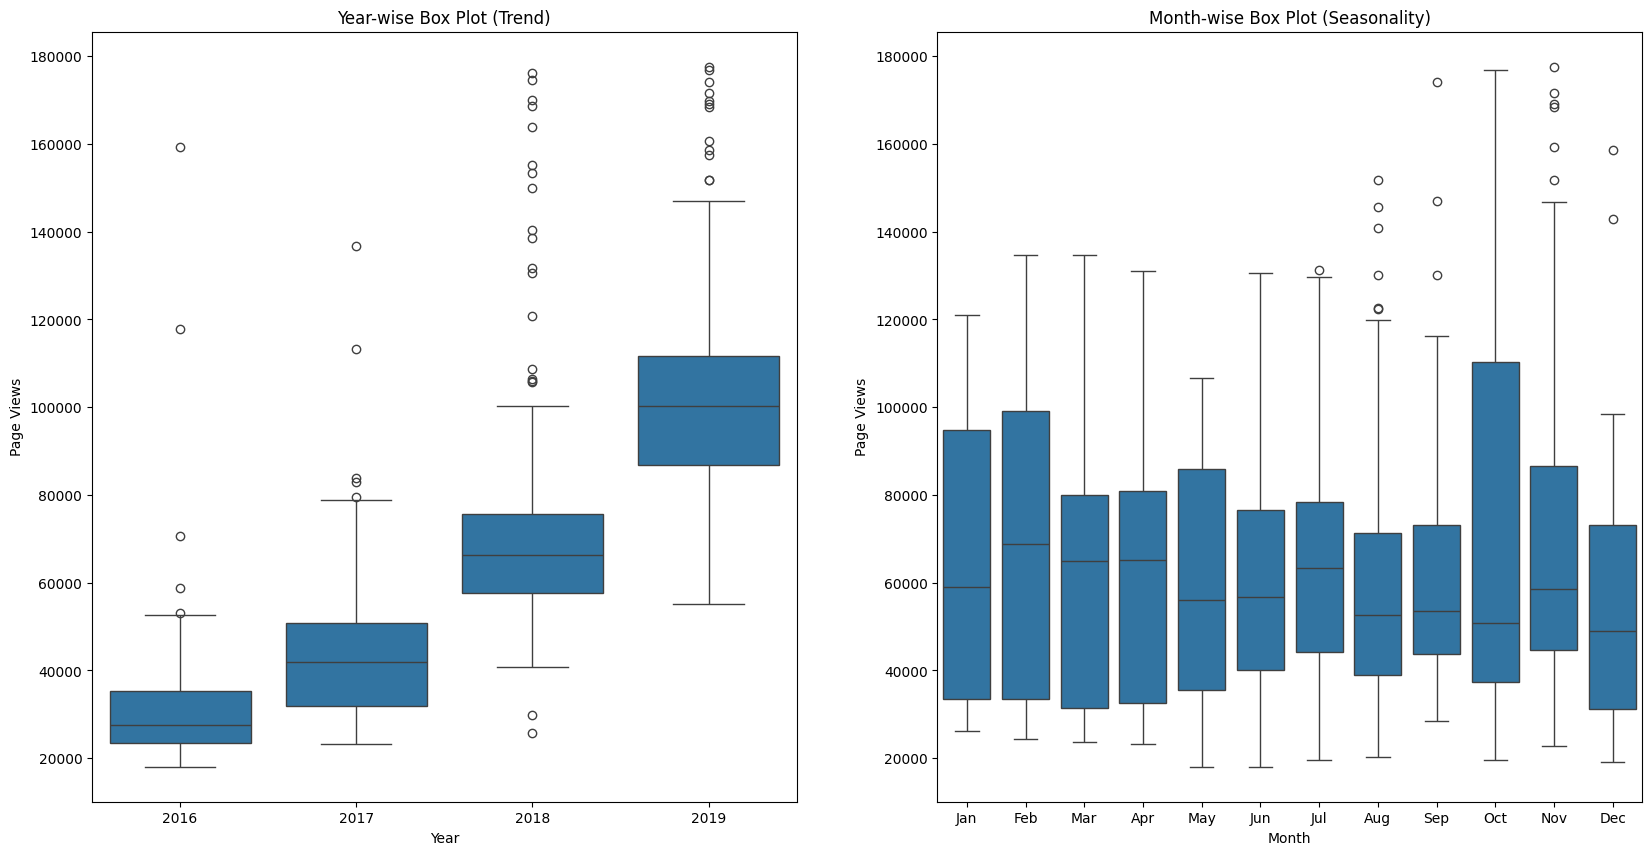

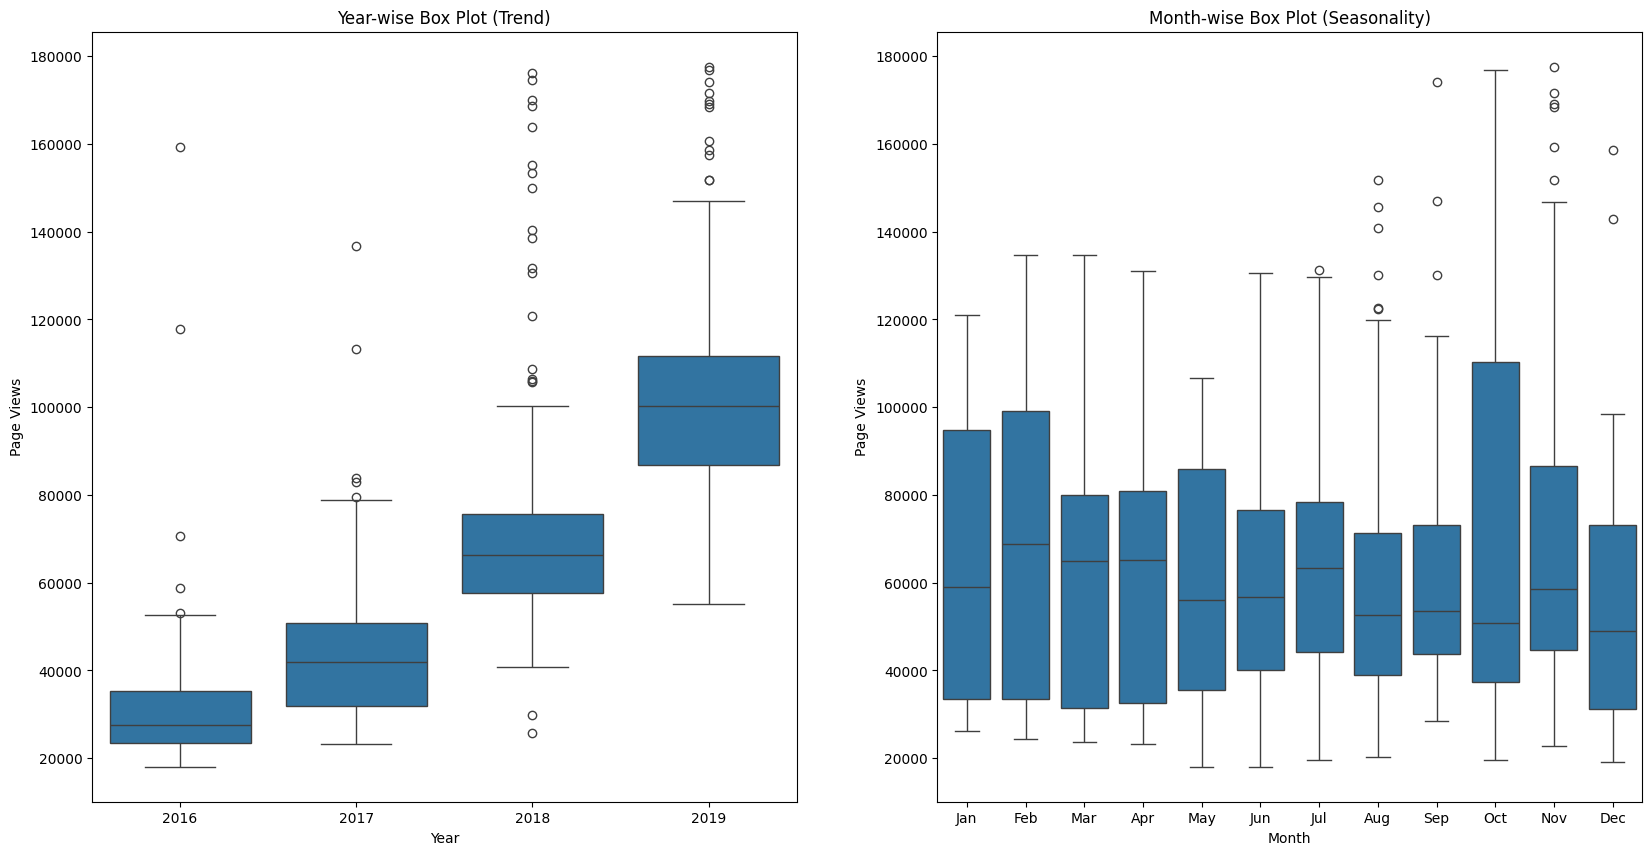

In [11]:
def draw_box_plot():
    # Prepara os dados para plotar o boxplot
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Plota o boxplot de distribuição mensal e anual
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    #Box plot de distribuição mensal
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    #Box plot de distribuição anual
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], 
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Salva a imagem e retorna a figura
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()